In [2]:
# Add better support for matplotlib
%matplotlib inline

In [3]:
from schedule_plotter.Process import Process
from schedule_plotter.plot_tools import plot_raw_data, plot

from schedule_plotter.implementations.FCFS import FCFS
from schedule_plotter.implementations.SJF import SPN, SRT
from schedule_plotter.implementations.RoundRobin import RoundRobin

# You can find this implementation at the bottom of this notebook
#from schedule_plotter.implementations.RoundRobin import RoundRobin

In [4]:
# Generate data from either csv or random-generated
dataset = Process.gen_n_random_in_range(9, (0,1), (1, 3), (1,20))
dataset = Process.read_from_csv("example/input.csv")

Plotting FirstComeFirstServed algorithm
Average wait time is 14.166666666666666


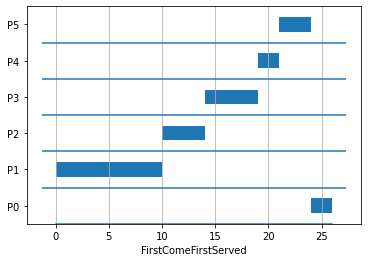

In [5]:
# Plot FCFS using test funciton
plot(FCFS, dataset)

Plotting ShortestProcessNext algorithm
Average wait time is 6.333333333333333


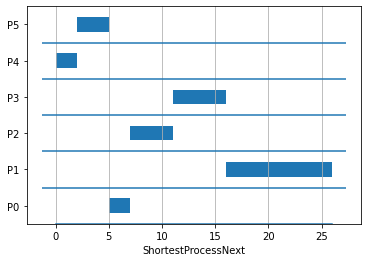

In [6]:
# Direct plotting of SPN
print(f"Plotting {SPN.name} algorithm")
scheduled_data = SPN.function(dataset)
plot_raw_data(SPN.name, scheduled_data)
print()

In [7]:
# -*- coding: utf-8 -*-
"""
    RoundRobin.py
    Implementation of the RoundRobin scheduling algorithm
    using the schedule_plotter packcage
"""

__author__ = "giulpig"
__license__ = "GPLv3"

from copy import deepcopy
from typing import Dict, List, Tuple

from schedule_plotter.Algorithm import Algorithm
from schedule_plotter.Process import Process
from schedule_plotter.PriorityQueueWrapper import PriorityQueueWrapper

# See interface in Algoritm class
def run(processes: List[Process], interaction: bool = False, quantum: int = 1) -> Dict[str, List[Tuple[int, int]]]:
    out = {}
    time_now = 0
    wait_time = 0

    processes_copy = deepcopy(processes)

    # FIFO queue
    ready_queue = PriorityQueueWrapper(sortBy="FIFO")

    while len(processes_copy)>0 or len(ready_queue)>0:
        
        # Insert new processes in queue
        while True:
            for proc in processes_copy[:]:
                if proc.start <= time_now:
                    ready_queue.put(proc)
                    processes_copy.remove(proc)

            if len(ready_queue) > 0:
                break
            
            time_now += 1

        # Get the process
        process = ready_queue.pop()

        burst_time = min(quantum, process.remaining_time)

        # Run it
        if process.id in out.keys():
            out[process.id].append((time_now, time_now+burst_time))
        else:
            out[process.id] = [(time_now, time_now+burst_time)]

        time_now += burst_time

        # Re-insert it if it is not finished
        process.remaining_time -= burst_time
        if process.remaining_time > 0:
            processes_copy.append(process)
        else:
            wait_time += time_now-process.start-process.duration


    print(f"Average wait time is {wait_time/len(processes)}")

    return out
    

RoundRobin = Algorithm("RoundRobin", run)

Plotting RoundRobin algorithm
Average wait time is 12.666666666666666


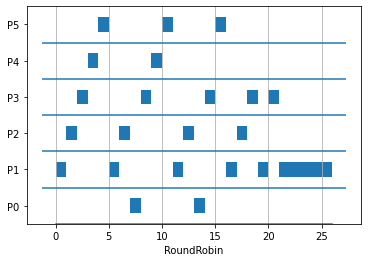

In [8]:
# Testing RoundRobin alorithm
plot(RoundRobin, dataset)